In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

In [2]:
id = 'I_0V'
deltas = [0.7, 0.75, 0.80, 0.85, 0.90]
tc = 0.5
sdB = 1
big_sum_z = []
big_sum_xi = []
for delta in deltas:
        filename = 'results_saved/' + f'follower_results_{id}_{sdB}_delta{delta}.xlsx'
        xi = pd.read_excel( filename, sheet_name='xi')
        sum_xi = xi.groupby('t').sum()
        e = pd.read_excel(filename, sheet_name='e')
        sum_e = e.groupby('t').sum()
        C = pd.read_excel(filename, sheet_name='C')
        sum_C = C.groupby('t').sum()
        z = pd.read_excel(filename, sheet_name='z')
        z['tcz'] = z['z']*tc
        sum_z = z.groupby('t').sum()

        big_sum_z.append(sum_z['z'].sum())
        big_sum_xi.append(sum_xi['xi'].sum())
        #big_sum_C = sum_C['C'].sum()

        # Plotting
        # First plot: sum_xi and sum_C with t as x axis
        fig, ax1 = plt.subplots()
        ax1.plot(sum_xi.index, sum_xi['xi'].astype(int), 'b-', label=r'Inv.')
        ax1.set_xlabel(r'$t$')
        ax1.set_ylabel(r'Inv.', color='b')
        ax1.tick_params('y', colors='b')

        ax2 = ax1.twinx()
        ax2.plot(sum_xi.index, sum_z['tcz'], 'r--', label=r'Trade')
        ax2.set_ylabel(r'Trade', color='r')
        ax2.tick_params('y', colors='r')
        ax2.set_ylim(bottom=0)

        fig.tight_layout()
        plt.xticks(sum_xi.index)
        plt.title(rf'Budget expenditures in emission control for {id} and $\delta$={delta} over time')
        fig.legend(loc='lower right', bbox_to_anchor=(1.1, 0.1))
        plt.savefig(f'budget_expenditures_{id}_{sdB}_delta{delta}.png', bbox_inches='tight', dpi=300)
        plt.close()

        # Second plot: sum_e, sum_C and sum_z with t as x axis
        fig, ax1 = plt.subplots()
        ax1.plot(sum_e.index, sum_e['e'], 'g-', label='Emissions')
        ax1.set_xlabel('t')
        ax1.set_ylabel(r'Emissions', color='g')
        ax1.tick_params('y', colors='g')

        ax2 = ax1.twinx()
        ax2.plot(sum_C.index, sum_C['C'], 'r--', label='Cap')
        ax2.plot(sum_z.index, sum_z['z'], 'k-.', label=r'Z')
        ax2.set_ylabel(r'Cap,  Z', color='k')
        ax2.tick_params('y', colors='k')

        plt.xticks(sum_e.index)
        plt.title(f'Emissions, cap, and traded emission e for {id} and delta={delta}')
        plt.tight_layout()
        fig.legend(loc='lower right', bbox_to_anchor=(1.1, 0.1))
        plt.savefig(f'emission_cap_traded_{id}_{sdB}_delta{delta}.png', bbox_inches='tight', dpi=300)

        #plt.show()
        plt.close()
        #break
        
        


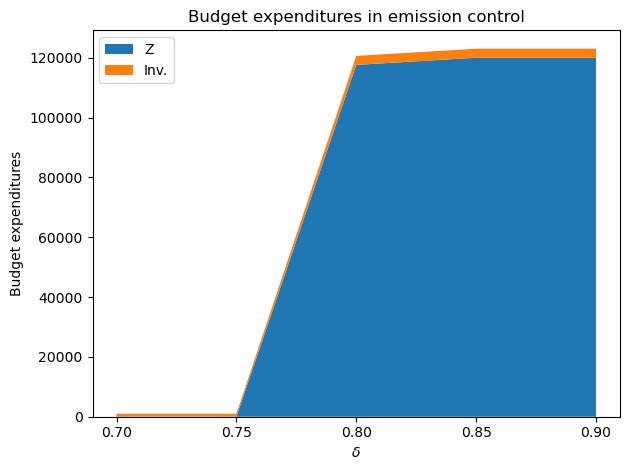

In [4]:
# Plotting
# Third plot: big_sum_z and big_sum_xi as stackplot with delta as x axis
fig, ax = plt.subplots()
ax.stackplot(deltas, big_sum_z, big_sum_xi, labels=['Z', 'Inv.'])
ax.set_xlabel(r'$\delta$')
ax.set_ylabel('Budget expenditures')
plt.xticks(deltas)
plt.title(rf'Budget expenditures in emission control') #for {id} and $\delta$
plt.legend(loc='upper left')
plt.tight_layout()
#plt.show()
plt.savefig(f'budget_expenditures_{id}_{sdB}.png', dpi=300)


In [3]:
#single graph
eta = 0.8
inst_id_1 =  'I_10R_eta_{}_result'.format(eta)
#filename = 'results/unreg_results_unregolated_unrTheo_False.xlsx'
#filenameT = 'results/unreg_results_unregolated_unrTheo_True.xlsx'
filename = 'results/' + inst_id_1 + '.xlsx'
dfE = pd.read_excel(filename, sheet_name='Et')
#dfe = df[['t', 'e']].groupby(['t']).sum()
dfE

,t,E
0,1,551.736740
1,2,612.152248
2,3,510.608676
3,4,567.244401
4,5,563.821520


[1 2 3 4 5]


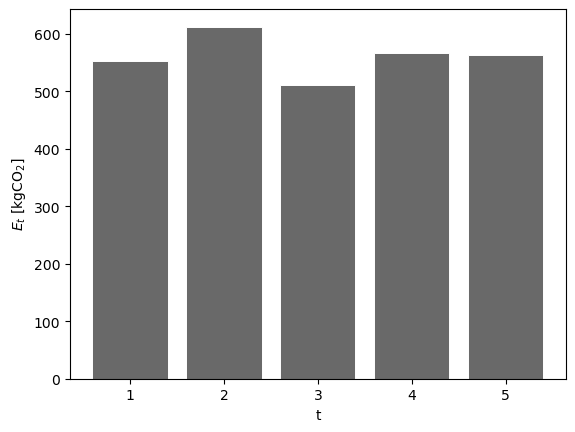

In [4]:
ax = plt.figure().add_subplot()
#ax.plot(dfe.index, dfe['e'], ls='-', color = 'r', label=r'unregolated')
xlabels = np.arange(1, len(dfE.index)+1)
print (xlabels)
pivot = np.arange(1, len(xlabels)+1)
ax.bar(xlabels, dfE['E'],width=0.8, color='dimgrey', edgecolor="white", linewidth=0.7)
#ax.plot(dfe.index, dfeT['e'], ls='--', color = 'g', label=r'unregolated Corollary 1')
ax.set_xlabel("t")
ax.set_ylabel(r"$E_t$ [kgCO$_2$]")
#ax.legend()
#plt.show()
plt.xticks(pivot, xlabels)
plt.savefig(inst_id_1 +".png", dpi = 600)

In [5]:
dfz = pd.read_excel(filename, sheet_name='z')
# Andamendo della CO2 scambiata ovvero definire una matrice plant/istante
# di tempo dove ogni entry ha un valore positivo per la CO2 entrante o un val-
# ore negativo per la CO2 uscente.
dfz
F = dfz['j'].max()
T = dfz['t'].max()
matr = np.zeros((F,F),dtype = float)
matrT = np.zeros((F,T),dtype = float)
#dfmatr = dfz.groupby(['j', 'jp']).sum()
#dfmatr
dfz
for index, row in dfz.iterrows():
    j = int(row['j'])
    jp = int(row['jp'])
    t = int(row['t'])
    d = float(row['z'])
    if j != jp:
        matr[j-1][jp-1] += d
        matrT[j-1][t-1] += d
        matrT[jp-1][t-1] -= d
"""
for j in range(5):
    for t in range (5):
            for jp in range(5):
                d = dfz[(dfz['j'] == j) & (dfz['jp'] == jp) & (dfz['t']==t)]['z'].values[0]
        matr[j,0] += dfz[]
"""
def latexMatr(matr):
    row = ""
    for i in range(matr.shape[0]):
        row += str(i+1) + " & "
        for j in range(matr.shape[1]):
            row +=  "{:.2f}".format(matr[i][j])
            if j < matr.shape[1] - 1:
                row += " & "
            else:
                row += ' \\\ '
        row += "\n"
    return row

print("MATRIX J -> JP")
print(latexMatr(matr))
print("\n")
print("MATRIX J - > t")
print(latexMatr(matrT))

MATRIX J -> JP
1 & 0.00 & 408.47 & 161.47 & 56.94 & 0.00 & 0.00 & 49.20 & 0.00 & 0.00 & 166.53 \\ 
2 & 107.94 & 0.00 & 124.33 & 112.42 & 0.00 & 0.00 & 177.66 & 0.00 & 106.94 & 0.00 \\ 
3 & 0.00 & 0.00 & 0.00 & 63.25 & 0.00 & 0.00 & 60.65 & 0.00 & 52.59 & 55.55 \\ 
4 & 242.29 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\ 
5 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\ 
6 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\ 
7 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\ 
8 & 0.00 & 0.00 & 0.00 & 298.73 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\ 
9 & 271.86 & 220.81 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\ 
10 & 242.68 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\ 



MATRIX J - > t
1 & -64.65 & -70.17 & -56.98 & 231.49 & -61.85 \\ 
2 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\ 
3 & -4.23 & -30.10 & -0.00 & -11.97 & -7.46 \\ 
4 & -54.06 & -63.25 & -58.36 & -56

In [42]:
matr.shape[0]

3

In [6]:
#a = dfz['z'].loc[dfz['j'] == 1 & dfz['jp'] == 3 & dfz['t']==2]
d = dfz[(dfz['j'] == 1) & (dfz['jp'] == 3) & (dfz['t']==2)]['z'].values[0]
print(d)


93.34877594188423


In [7]:
dfz

,j,jp,t,z
0,1,1,1,0.0
1,1,1,2,0.0
2,1,1,3,0.0
3,1,1,4,0.0
4,1,1,5,0.0
...,...,...,...,...
495,10,10,1,0.0
496,10,10,2,0.0
497,10,10,3,0.0
498,10,10,4,0.0


In [8]:
print("                     \n \
      ###              ##### \n \
      ###  2 INSTANCES ##### \n \
      ###              #####  \n \
      ")

                     
       ###              ##### 
       ###  2 INSTANCES ##### 
       ###              #####  
       


In [9]:
eta = 0.5
inst_id_1 =  'I_10R' + '_eta_{}'.format(eta)
inst_id_2 = 'I_10RT' + '_eta_{}'.format(eta)
#filename = 'results/unreg_results_unregolated_unrTheo_False.xlsx'
#filenameT = 'results/unreg_results_unregolated_unrTheo_True.xlsx'
filename = 'results/' + inst_id_1 + '_result.xlsx'
filenameT = 'results/' + inst_id_2 + '_result.xlsx'
dfE = pd.read_excel(filename, sheet_name='Et')
dfET = pd.read_excel(filenameT, sheet_name='Et')
#df = df[['t', 'e']]
#dfT = dfT[['t', 'e']]
#dfT

In [18]:
#dfe = df.groupby(['t']).sum()
#dfeT = dfT.groupby(['t']).sum()
#dfeT

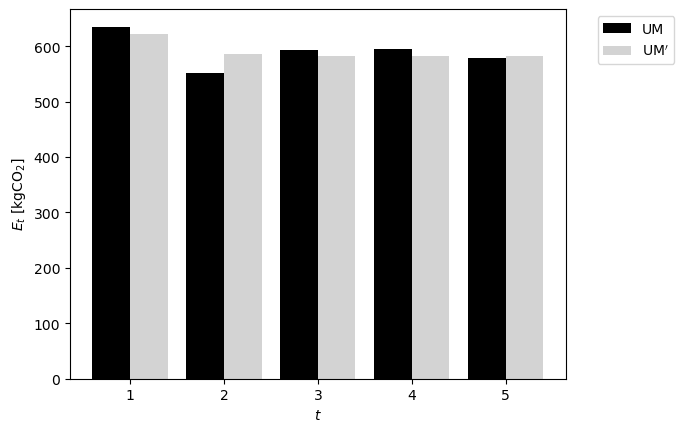

In [10]:
ax = plt.figure().add_subplot()
x_labels = np.array([1,2,3,4,5])
pivot = np.arange(1,len(x_labels)+1)
ax.bar(x_labels - 0.2, dfE['E'], width=0.4 , color = 'black', label=r'UM') # ls='-'
ax.bar(x_labels + 0.2, dfET['E'],  width=0.4 , color = 'lightgrey', label=r'UM$^{\prime}$') #ls='--'

plt.xticks(pivot, xlabels)
ax.set_xlabel("$t$")
ax.set_ylabel(r"$E_t$ [kgCO$_2$]")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#ax.legend(loc='upper right')
#ax.tight_layout()
#plt.show()
plt.savefig("../{}vs{}.png".format(inst_id_1,inst_id_2), bbox_inches='tight', dpi = 600)

In [11]:
print("""
#######################
#### PARETO CURVE #####
#######################
""")


#######################
#### PARETO CURVE #####
#######################



In [12]:
inst_id1 = "I_10R"
inst_id2 = "I_10RT"
paretof1 = "pareto_{}.csv".format(inst_id1)
paretof2 = "pareto_{}.csv".format(inst_id2)
dfp1 = pd.read_csv(paretof1)
dfp1 = dfp1[["cost", "emissions"]]
dfp1.sort_values(["cost"],inplace=True )
max = dfp1.loc[0]["emissions"]
for index, row in dfp1.iterrows():
    if row["emissions"] > max:
        dfp1.drop(index, inplace=True)
    else:
        max = row["emissions"]
dfp2 = pd.read_csv(paretof2)
dfp2 = dfp2[["cost", "emissions"]]
dfp2.sort_values(["cost"],inplace=True )
max = dfp2.loc[0]["emissions"]
for index, row in dfp2.iterrows():
    if row["emissions"] > max:
        dfp2.drop(index, inplace=True)
    else:
        max = row["emissions"]
dfp2

,cost,emissions
0,35752.628291,77247.201006
1,35752.628291,77247.201006
2,35752.823508,77246.119815
4,56350.589235,2955.383645
5,56350.589235,2955.383645
6,56435.156536,2894.795585
7,56454.520670,2885.585846
8,56674.466683,2820.014053
9,57163.338593,2727.104149
10,57800.864034,2700.353444


I_10RT


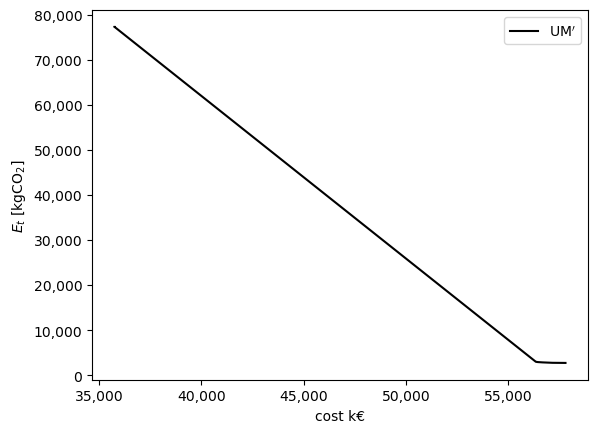

In [17]:
ax = plt.figure().add_subplot()
#ax.plot(dfp1['cost'], dfp1['emissions'], ls='-', color = 'black', label=r'UM')
ax.plot(dfp2['cost'], dfp2['emissions'], ls='-', color = 'black', label=r'UM$^{\prime}$')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel("cost k€")
ax.set_ylabel(r"$E_t$ [kgCO$_2$]")
ax.legend()
#plt.show()
print(inst_id2)
plt.savefig("../pareto_{}.png".format(inst_id2), dpi = 600)

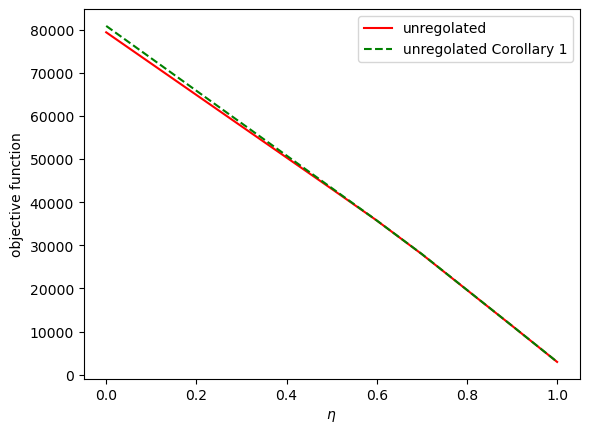

In [78]:
# Objective Function
dfp1 = pd.read_csv(paretof1)
dfp2 = pd.read_csv(paretof2)
dfp1['Z'] =  dfp1['cost']*(1-dfp1['eta']) + dfp1['emissions']*dfp1['eta']
dfp2['Z'] =  dfp2['cost']*(1-dfp2['eta']) + dfp2['emissions']*dfp2['eta']
ax = plt.figure().add_subplot()
ax.plot(dfp1['eta'],dfp1['Z'], ls='-', color = 'r', label=r'unregolated')
ax.plot(dfp2['eta'], dfp2['Z'], ls='--', color = 'g', label=r'unregolated Corollary 1')
ax.set_xlabel("$\eta$")
ax.set_ylabel(r"objective function")
ax.legend()
#plt.show()
plt.savefig("../objf_eta_{}_vs_{}.png".format(inst_id1, inst_id2), dpi = 600)

In [6]:
print("""
###############
##############
#####ETA#######
##############
###############
""")



###############
##############
#####ETA#######
##############
###############



In [120]:
dfeta = pd.read_excel('R10T_results_etas.xlsx', index_col='t')
dfeta

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
t,,,,,,,,,,,
1,16254.38032,16723.860272,16606.045125,635.261817,635.261817,621.252290,660.106950,672.650997,655.737505,610.926759,555.317315
2,15314.51551,15783.995463,15666.180316,599.556340,599.556340,585.546812,594.714164,634.201253,564.273328,564.289576,543.093151
3,15244.37876,15611.729253,15473.431140,592.136978,573.521829,582.861514,569.841480,526.244532,533.334407,525.301928,537.646248
4,15244.37876,15611.729253,15473.431140,592.136978,573.521829,582.861514,569.841480,526.244532,533.334407,514.907189,536.280472
5,15189.54766,13515.886764,14027.032095,536.291533,573.521829,582.861514,500.291510,526.244532,533.334407,511.678697,528.016257


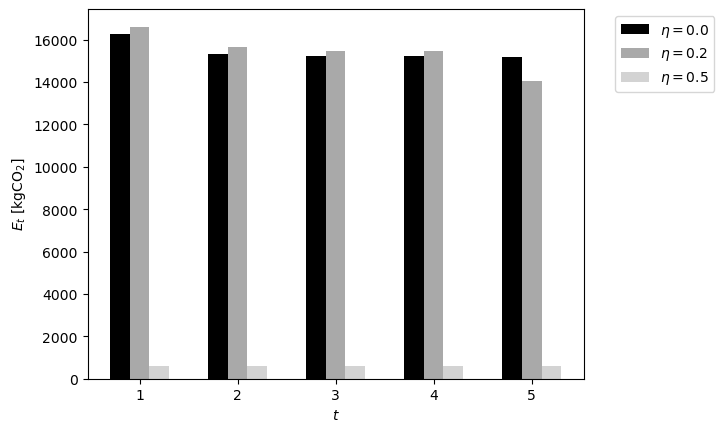

In [123]:
ax = plt.figure().add_subplot()
#ax.plot(dfeta.index, dfeta[0.0], ls='-', label=r'$\eta=0.0$')
#ax.plot(dfeta.index, dfeta[0.2], ls='--', label=r'$\eta=0.2$')
x_labels = np.array([1,2,3,4,5])
pivot = np.arange(1,len(x_labels)+1)
ax.bar(x_labels - 0.2,  dfeta[0.0], width=0.2, color = 'black', label=r'$\eta=0.0$') # ls='-'
ax.bar(x_labels ,  dfeta[0.2],  width=0.2 , color = 'darkgrey', label=r'$\eta=0.2$') #ls='--'
ax.bar(x_labels + 0.2,  dfeta[0.5],  width=0.2 , color = 'lightgrey', label=r'$\eta=0.5$') #ls='--'

plt.xticks(pivot, xlabels)

#ax.plot(dfeta.index, dfeta[0.5], ls='-', color='black',label=r'$\eta=0.5$')
#ax.plot(dfeta.index, dfeta[0.8], ls='--',color='black', label=r'$\eta=0.8$')
#ax.plot(dfeta.index, dfeta[1.0], ls=':', color='black', label=r'$\eta=1.0$') #(0, (3, 1, 1, 1, 1, 1))
ax.set_xlabel("$t$")
ax.set_ylabel(r"$E_t$ [kgCO$_2$]")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.show()
plt.savefig("../I10RT_ETAparte1.png", bbox_inches='tight', dpi = 600)

In [14]:
dfeta[0.0]

t
1    160091.354344
2    153042.332207
3    153042.332207
4    153042.332207
5    143657.310864
Name: 0.0, dtype: float64